## ВШЭ, ФКН, Программа "Специалист по DS" (2021/2022)
## Курс "Прикладная статистика для ML"
### ДЗ №4: Корреляция и тесты с метриками-отношениями
#### *Выполнил: Кирилл Н., 30.01.2022 г.*

### Часть 1. Вопросы на корреляцию (10 баллов).

**1. Что можно сказать про случайные величины X и Y, если Corr(X, Y ) = 1?**

Если Corr(X, Y) = 1, то X и Y линейно зависимы, т.е. Y = kX + b, причем k > 0.
При этом между данными случайными величинами необязательно может быть причинно-следственная связь. 

**2. Чем отличаются коэффициенты корреляции Пирсона и Спирмена? 
В каких случаях лучше пользоваться коэффициентом корреляции Спирмена?**

Коэффициент корреляции Пирсона считается непосредственно по числовым значениям случайных величин, 
а коэффициент Спирмена - по их рангам. 

Последний имеет более высокую устойчивость к выбросам. Также ранговые коэффиценты предпочтительнее использовать, 
если, по меньшей мере, одна из двух переменных имеет порядковую шкалу.

**3. Дана случайная величина X, равномерно распределенная на отрезке [−1, 1] и величина Y = |X|. 
Чему равен их коэффициент корреляции (вычислите Cov(X, Y)/$\sqrt{Var(X)Var(Y)}$) ?**

Коэффициент корреляции $Сorr(X, Y) = \frac{Сov(X,Y)}{\sqrt{Var(X)Var(Y)}}$, где
- $Сov(X,Y) = E[XY] - E[X]E[Y],$ 
- $Var(X) = E[X^2] - (E[X])^2,$
- $Var(Y) = E[Y^2] - (E[Y])^2.$

Вычислим отдельно математические ожидания:
- $E[XY] = \int\limits_{-1}^{1}x|x|\frac{1}{2}dx = \frac{1}{2}[-\int\limits_{-1}^{0}x^2dx + \int\limits_{0} ^{1}x^2dx] = 
\frac{1}{2}[-\frac{x^3}{3}|_{-1}^0 + \frac{x^3}{3}|_{0}^1] = \frac{1}{6}(-1+1) = 0,$ 
- $E[X] = \frac{-1+1}{2} =0,$ 
- $E[X^2] = E[Y^2] = \int\limits_{-1}^{1}x^2\frac{1}{2}dx = \frac{1}{2}\frac{x^3}{3}|_{-1}^1 = \frac{1}{6}(1+1) = \frac{1}{3},$ 
- $E[Y] = \int\limits_{-1}^{1}|x|\frac{1}{2}dx = \frac{1}{2}[-\int\limits_{-1}^{0}xdx + \int\limits_{0} ^{1}xdx] = 
\frac{1}{2}[-\frac{x^2}{2}|_{-1}^0 + \frac{x^2}{2}|_{0}^1] = \frac{1}{4}[1+1] = \frac{1}{2}.$ 

Таким образом, $Сov(X,Y) = 0$ $\Rightarrow$ $Сorr(X,Y) = 0$.

In [1]:
# Cмоделиурем эту задачу на 2-х массивах случайных чисел
import numpy as np
from scipy import stats

np.random.seed(1)
x = np.random.uniform(-1, 1, size=1000)
y = abs(x)

p = stats.pearsonr(x,y)
print("Коэффициент корреляции Пирсона: {:.4f}, значимость p-value: {:.2f}%".format(p[0], p[1]*100))

Коэффициент корреляции Пирсона: -0.0149, значимость p-value: 63.85%


<span style="color:blue">
Вывод: полученное значение подтверждает отсутствие значимой линейной зависимости между данными случайными величинами. 
</span>

**4. Дана случайная величина X, равномерно распределенная на отрезке
[−1, 1], и величина Y = $X^2$. Сгенерируйте выборку длины 1000 величины X 
и на основании нее получите соответствующую выборку для величины Y. 
По полученным выборкам посчитайте коэффициенты корреляции Пирсона и Спирмена.**

In [2]:
import numpy as np
from scipy import stats

np.random.seed(2)
x = np.random.uniform(-1, 1, size=1000)
y = x**2

p = stats.pearsonr(x,y)
print("Коэффициент корреляции Пирсона: {:.4f}, значимость p-value: {:.2f}%".format(p[0], p[1]*100))

s = stats.spearmanr(x,y)
print("Коэффициент корреляции Спирмена: {:.4f}, значимость p-value: {:.2f}%".format(s[0], s[1]*100))

Коэффициент корреляции Пирсона: 0.0270, значимость p-value: 39.34%
Коэффициент корреляции Спирмена: -0.0325, значимость p-value: 30.52%


<span style="color:blue">
Вывод: полученные значения подтверждают отсутствие значимой линейной зависимости между данными случайными величинами. 
</span>

### Часть 2. Вопросы на тесты с метриками-отношениями (10 баллов).

**1. В чем причина того, что биномиальный тест для доли часто плохо работает на практике и в чем это выражается 
(см. гифку про биномиальный тест)?**

На практике часто нарушаются предположения биномиального теста о нормальности и о том, 
что доли имеют одинаковое распределение. 
При больших отклонениях p-value перестаёт ограничивать FPR, что приводит к ложноположительным результатам 
А/А-тестов (т.е. нарушается требование однородности). 
Поэтому такой тест перестает быть значимым.

**2. Верно ли, что Пуассоновский бутстреп для общегруппового CTR для всех рассмотренных нами случаев показывал 
лучшие результаты, чем тест Манна-Уитни на кликах (без бакетного преобразования)?**

При небольших отклонениях Пуассоновский бутстреп значительно превосходит тест Манна-Уитни, но если скошенность
превышает некоторый критический уровень, то он также перестает контролировать долю ошибок 1-го рода и соответственно
показывает некорректные результаты.

**3. Для чего в задаче об оценке разницы в общегрупповом CTR был необходим дельта-метод (см.ноутбук и статью)?**

Дельта-метод позволяет получить нормальную апроксимацию некоторой непрерывной функции от случайной величины или 
случайного вектора. В нашем случае эта функция равна отношению математических ожиданий кликов и показов, т.е. CTR.
В результате мы сможем посчитать дисперсии CTR для различных групп пользователей, 
которые в свою очередь используются для вычисления z-статистики при проверке нулевой гипотезы $CTR_{target} = CTR_{control}$. 

**4. Объясните, как проводятся тесты над метриками с использованием бакетного преобразования? 
Какого рода метрики можно рассчитывать внутри бакета?**

Пользователи разбиваются на n бакетов таким образом, чтобы каждый пользователь попал только в один бакет,
и все пользователи были распределены по ним равномерно. 
Это можно гарантировать, например, с помощью техники хеширования с солью. 
Далее поверх бакетного преобразования применяются, например, стандартный t-тест 
(если более или менее выполнены его предположения) или тест Манна-Уитни.
Внутри бакета обычно рассчитываются средние или медианы.

### Часть 3. Практические задачи.

**Упражнение 1 (20 баллов).** В файле lifeline.xls содержатся 50 пар наблюдений из исследования докторов Л. Матера и М. Уилсона. 
В нем рассматривались следующие переменные: X — длина «линии жизни» на левой руке
в сантиметрах (с точностью до 0.15 см) и Y — продолжительность жизни человека (округленная до ближайшего целого года). 
Изучите корреляцию X и Y . Верно ли, что X и Y связаны линейной регрессионной зависимостью?

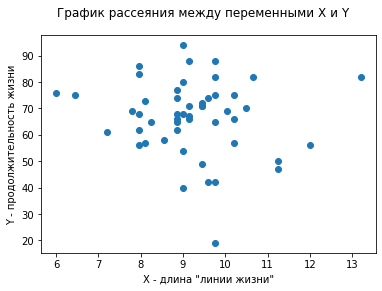

In [3]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_excel('lifeline.xls')
x = data['X']
y = data['Y']

fig, ax = plt.subplots(ncols=1, figsize=(6,4)) 
plt.scatter(x, y)
ax.set_xlabel('X - длина "линии жизни"')
ax.set_ylabel('Y - продолжительность жизни')
plt.suptitle('График рассеяния между переменными X и Y')
plt.show()

<span style="color:blue">
Вывод: график показывает отсутствие выраженной линейной зависимости между данными величинами. 
</span>

In [4]:
p = stats.pearsonr(x,y)
print("Коэффициент корреляции Пирсона: {:.4f}, значимость p-value: {:.2f}%".format(p[0], p[1]*100))

s = stats.spearmanr(x,y)
print("Коэффициент корреляции Спирмена: {:.4f}, значимость p-value: {:.2f}%".format(s[0], s[1]*100))

k = stats.kendalltau(x,y)
print("Коэффициент корреляции Кендалла: {:.4f}, значимость p-value: {:.2f}%".format(k[0], k[1]*100))

Коэффициент корреляции Пирсона: -0.1226, значимость p-value: 39.65%
Коэффициент корреляции Спирмена: -0.0860, значимость p-value: 55.26%
Коэффициент корреляции Кендалла: -0.0450, значимость p-value: 65.59%


<span style="color:blue">
Вывод: полученные значения подтверждают отсутствие значимой линейной зависимости между данными величинами. 
</span>

**Упражнение 2 (20 баллов).** Сгенерируйте 100 выборок длины 1000 из распределения N(0, 1)+exponential(1). 
Для каждой из выборок $X_1, X_2,..,X_{100}$ постройте по 5 выборок Y вида:
- $Y^{(1)} = X_{i}^2+0.1N(0,1),$
- $Y^{(2)} =\sqrt{|X_i|} + 0.1N(0,1),$
- $Y^{(3)} = X_i ∗ sin(Xi) + 0.1N(0, 1),$
- $Y^{(4)} = {X_i}^3 + 0.1N(0, 1),$
- $Y^{(5)} = {X_i}^3 * cos(X_i) + 0.1N(0, 1).$

Для каждой пары выборок (Xi, соответствующая ей Yi), посчитать коэффициенты корреляции Спирмена и Кендалла. 
(Всего должно получиться 500 значений для Спирмена и 500 значений для Кендалла). 
Нарисуйте диаграмму рассеяния (scatterplot), где по оси X будет корреляция Спирмена, а по оси Y - Кендалла. 
Можно ли сказать на основании собранных нами данных, что эти коэффициенты корреляции как-то связаны друг с другом?

In [5]:
import numpy as np
from scipy import stats

s = []
k = []
np.random.seed(123)
for i in range (0,100):
    x = np.random.randn(1,1000) + np.random.exponential(1, 1000)
    
    y1 = x**2 + 0.1*np.random.randn(1,1000)
    s.append(stats.spearmanr(x[0],y1[0])[0])
    k.append(stats.kendalltau(x[0],y1[0])[0])
    
    y2 = np.sqrt(abs(x)) + 0.1*np.random.randn(1,1000)
    s.append(stats.spearmanr(x[0],y2[0])[0])
    k.append(stats.kendalltau(x[0],y2[0])[0])
    
    y3 = x*np.sin(x) + 0.1*np.random.randn(1,1000)
    s.append(stats.spearmanr(x[0],y3[0])[0])
    k.append(stats.kendalltau(x[0],y3[0])[0])

    y4 = x**3 + 0.1*np.random.randn(1,1000)
    s.append(stats.spearmanr(x[0],y4[0])[0])
    k.append(stats.kendalltau(x[0],y4[0])[0])

    y5 = (x**3)*np.cos(x) + 0.1*np.random.randn(1,1000)
    s.append(stats.spearmanr(x[0],y5[0])[0])
    k.append(stats.kendalltau(x[0],y5[0])[0])

In [6]:
print("Среднее значение взятых по модулю коэффициентов Спирмена: {:.4f}".format(np.mean(np.absolute(s))))
print("Среднее значение взятых по модулю коэффициентов Кендалла: {:.4f}".format(np.mean(np.absolute(k))))

Среднее значение взятых по модулю коэффициентов Спирмена: 0.6321
Среднее значение взятых по модулю коэффициентов Кендалла: 0.5357


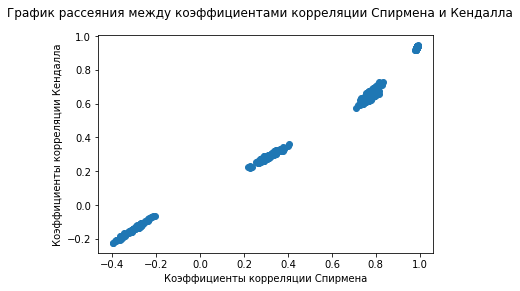

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(ncols=1, figsize=(6,4)) 
plt.scatter(s, k)
ax.set_xlabel('Коэффициенты корреляции Спирмена')
ax.set_ylabel('Коэффициенты корреляции Кендалла')
plt.suptitle('График рассеяния между коэффициентами корреляции Спирмена и Кендалла')
plt.show()

<span style="color:blue">
Вывод: график показывает, что между данными коэффициентами действительно имеется сильная линейная связь.
Это было ожидаемо, т.к. обе разновидности коэффициентов являются ранговыми и считаются похожим образом.
При этом, как следует из ранее посчитанных арифметических средних, в большинстве случаев коэффициенты Спирмена
имеют большие по модулю значения.
Это объясняется тем, что инверсиям у Спирмена придаются дополнительные веса, и поэтому 
они сильнее реагируют на несогласие ранжировок.
</span>

### Часть 4. Проект в закрытой формулировке.

**Обязательная задача (80 баллов).** Представьте, что ваша компания занимается продажей товаров. Покупка устроена так: человек заходит на сайт
(аналогично нашему показателю views), затем совершает покупку с некоторой вероятностью 
(аналогично нашему success-rate с бета-распределением) и далее совершает покупку (аналогично нашему clicks). 
Каждая покупка характеризуется каким-то "чеком"(стоимостью товара), его можно моделировать с помощью 
экспоненциального распределения вида $Ce^{−λx}$ на интервале [100, 2500] 
(подберите для этого распределения правильную нормировочную константу C и некоторую разумную λ, помните - это распределение
чеков на покупку каких-то недорогих, частых товаров).

Допустим, что в обеих группах базовый success-rate = 0.03 , а в группе B его uplift равен 0.1. 
Кроме того, в группе B распределение чеков имеет меньшее значение λ: $λ_A = 1.2λ_B$.

Мы хотим измерить, значимо ли меняется значение 80 квантиля для
чека пользователей в группе. Проверьте, какой из тестов для этого лучше
подойдет: тест Манна-Уитни поверх бакетного преобразования или Пуассоновский бутстреп? 
Как их работоспособность зависит от скошенности распределений истинного CTR (бета-распределения) пользователей и показов
(логнормального распределения). Для оценки можно использовать те же параметры, что и в лекции.

<span style="color:red">
Примечание: <br>
- в моем решении вместо квантилей анализируются чеки;<br>
- переход к чекам показан в функции generation, при этом они все равно называются кликами,
чтобы не пришлось менять названия в других местах;<br>
- остальной код перенесен с семинарского занятия без изменений.
</span>

In [1]:
import numpy as np
import seaborn as sns
import scipy
from scipy.stats import norm, probplot, rankdata
from matplotlib import pyplot as plt
from matplotlib.axes import Axes
from typing import Tuple, Dict, Optional, Set, List
import os
import re
from IPython.display import HTML
from PIL import Image
import imageio
%matplotlib inline

In [2]:
N = 5000 # Длина выборки
experiments = 1000 # Кол-во экспериментов
mu = 1
sigma2 = 1.0
success_rate = 0.03
uplift = 0.1
beta = 1000
alpha = success_rate * beta / (1 - success_rate)

sigma2_list = [0.1, 0.5, 1.0]
beta_list = [100, 500, 1000]
colors = sns.color_palette("deep")

**Вспомогательные функции**

In [3]:
def plot_cdf(data: np.ndarray, label: str, ax: Axes, color: str = colors[0], linewidth=3):
    sorted_data = np.sort(data)
    position = scipy.stats.rankdata(sorted_data, method='ordinal')
    cdf = position / data.shape[0]

    sorted_data = np.hstack((sorted_data, 1))
    cdf = np.hstack((cdf, 1))

    return ax.plot(sorted_data,
                   cdf,
                   color=color,
                   linestyle='solid',
                   label=label,
                   linewidth=linewidth)

In [4]:
def data_loader(folder_path):

    views_a_1 = np.load(folder_path+'/views_a_1.npy')
    views_a_2 = np.load(folder_path+'/views_a_2.npy')
    views_b = np.load(folder_path+'/views_b.npy')

    success_rate_a_1 = np.load(folder_path+'/success_rate_a_1.npy')
    success_rate_a_2 = np.load(folder_path+'/success_rate_a_2.npy')
    success_rate_b = np.load(folder_path+'/success_rate_b.npy')

    clicks_a_1 = np.load(folder_path+'/clicks_a_1.npy')
    clicks_a_2 = np.load(folder_path+'/clicks_a_2.npy')
    clicks_b = np.load(folder_path+'/clicks_b.npy')

    return views_a_1, views_a_2, views_b,\
            success_rate_a_1, success_rate_a_2, success_rate_b,\
            clicks_a_1, clicks_a_2, clicks_b

In [5]:
def p_value_saver(folder_path, name, p_values_ab, p_values_aa):
    np.save(folder_path+'/p_values_ab_'+name+'.npy', p_values_ab)
    np.save(folder_path+'/p_values_aa_'+name+'.npy', p_values_aa)

In [6]:
# Функция удаления картинок
def del_png(gif_list):
    for i in gif_list:
        os.remove(i)

In [7]:
# Функция заворачивания в GIF
def to_gif(png_list, gif_name):
    frames = []
    for i in png_list:
        new_frame = Image.open(i)
        frames.append(new_frame)

    frames[0].save(gif_name, format='GIF',
                   append_images=frames[1:],
                   save_all=True,
                   duration=800, loop=0)

In [8]:
# Функция генерации данных для А/А- и A/B-эксперимента при заданных значениях параметров теста.
# Возвращает три набора выборок: sample_a_1, sample_a_2 и sample_b.
def generation(N=5000,  # Кол-во человек в выборке
               experiments=1000,  # Кол-во синтетических экспериментов А/А и А/В
               # Один из параметров распределения просмотров (можете самостоятельно его пошатать)
               mu=1,
               # Скошенность распределения просмотров (можете самостоятельно его пошатать)
               sigma2=1.0,
               success_rate=0.03,  # Истинный CTR в контрольной группе
               uplift=0.1,  # Аплифт теста над контролем. По умолчанию 20%
               beta=1000  # Параметр для контроля дисперсии распределения истинного CTR
               ):
         
    # На просмотры мы не влияем, поэтому тут сэмплирование одинаковое
    # Но что будет, если мы влияем на просмотры?
    views_a_1 = np.exp(norm(mu, sigma2).rvs(experiments * N)
                       ).astype(np.int32).reshape(experiments, N) + 1
    views_a_2 = np.exp(norm(mu, sigma2).rvs(experiments * N)
                       ).astype(np.int32).reshape(experiments, N) + 1
    views_b = np.exp(norm(mu, sigma2).rvs(experiments * N)
                     ).astype(np.int32).reshape(experiments, N) + 1

    # Правит проблемы для случаев слишком большой скошенности
    views_a_1 = np.absolute(views_a_1)
    views_a_2 = np.absolute(views_a_2)
    views_b = np.absolute(views_b)

    # Истинный CTR для групп А/А
    alpha_a = success_rate * beta / (1 - success_rate)
    success_rate_a_1 = scipy.stats.beta(alpha_a, beta).rvs(
        experiments * N).reshape(experiments, N)
    success_rate_a_2 = scipy.stats.beta(alpha_a, beta).rvs(
        experiments * N).reshape(experiments, N)

    # Истинный CTR для группы В
    alpha_b = success_rate * (1 + uplift) * beta / \
        (1 - success_rate * (1 + uplift))
    success_rate_b = scipy.stats.beta(alpha_b, beta).rvs(
        experiments * N).reshape(experiments, N)

    # Распределение кликов в группах
    clicks_a_1 = scipy.stats.binom(n=views_a_1, p=success_rate_a_1).rvs()
    clicks_a_2 = scipy.stats.binom(n=views_a_2, p=success_rate_a_2).rvs()
    clicks_b = scipy.stats.binom(n=views_b, p=success_rate_b).rvs()

    # Коэффициент lambda подобран экспериментально, чтобы значения каждого чека лежали в интервале [100, 2500]
    lambda_B = 1/400
    lambda_A = 1.2*lambda_B

    # Переходим к чекам
    clicks_a_1 = clicks_a_1 * scipy.stats.expon.rvs(loc=100, scale=1/lambda_A)
    clicks_a_2 = clicks_a_2 * scipy.stats.expon.rvs(loc=100, scale=1/lambda_A)
    clicks_b = clicks_b * scipy.stats.expon.rvs(loc=100, scale=1/lambda_B)
    
    '''
    # Переходим к квантилям
    clicks_a_1 = np.quantile(clicks_a_1, 0.8, axis=1)
    clicks_a_2 = np.quantile(clicks_a_2, 0.8, axis=1)
    clicks_b = np.quantile(clicks_b, 0.8, axis=1)
    '''
    return views_a_1, views_a_2, views_b,\
        success_rate_a_1, success_rate_a_2, success_rate_b,\
        clicks_a_1, clicks_a_2, clicks_b

In [9]:
def plot_summary(data, #Сюда мы будем укладывать сгенерированные данные 
                 ground_truth_ctr,
                 views
                ):
    cdf_h1_title = 'p-value при справедливости H1 (Sensitivity)'
    cdf_h0_title = 'p-value при справедливости H0 (FPR)'
    
    # Делаем табличку 4*3 из графиков
    fig = plt.figure(constrained_layout=False, figsize=(3 * 3.5, 3.5 * 3), dpi = 100)
    gs = fig.add_gridspec(4, 3)
    
    # Распределяем графики по сетке
    ax_h1 = fig.add_subplot(gs[:2, :2]) # Чувствительность на А/В
    ax_h0 = fig.add_subplot(gs[0, 2]) # Контроль FPR на A/A
    ax_views = fig.add_subplot(gs[1, 2]) # Просмотры в контроле
    ax_clicks = fig.add_subplot(gs[2, 2]) # клики в контроле
    ax_powers = fig.add_subplot(gs[2, :2]) # Мощности сравниваемых критериев (чувствительность на 0.05)
    ax_fpr = fig.add_subplot(gs[3, :2]) # Контроль FPR при на уровне 0.05
    
    # Подгонка отображения 
    fig.subplots_adjust(left=0.2, wspace=0.3, hspace=0.4)
    
    # Нарисуем диагонали на гарфиках с p-value, чтобы удобнее было сравнивать
    ax_h1.plot(np.linspace(0, 1, 10000), np.linspace(0, 1, 10000), 'k', alpha=0.1)
    ax_h0.plot(np.linspace(0, 1, 10000), np.linspace(0, 1, 10000), 'k', alpha=0.1)

    
    ax_h1.set_title(cdf_h1_title)
    ax_h0.set_title(cdf_h0_title)

    # ax_h1.set_ylabel('Sensitivity')
    # ax_h0.set_ylabel('FPR')

    ax_h1.axvline(0.05, color='k', alpha=0.5)
    # ax_h1.set_xticks(list(ax_h1.get_xticks()) + [0.05])
    
    # Рисуем графики p-value для А/А и А/B для всех тестов
    for title, (ab_pvals, aa_pvals, color) in data.items():
        plot_cdf(ab_pvals, title, ax_h1, color, linewidth=3)
        plot_cdf(aa_pvals, title, ax_h0, color, linewidth=1.5)
    
    ax_h1.grid(True)
    ax_h0.grid(True)
    
    ax_powers.set_title('Test Power')
    ax_fpr.set_title(r'False Positive rate для $\alpha = 0.05$')
    tests_powers = []
    tests_fprs = []
    tests_labels = []
    tests_colours = []
    
    for title, (ab_pvals,aa_pvals, color) in data.items():
        tests_labels.append(title)
        tests_colours.append(color)
        tests_powers.append(np.mean(ab_pvals < 0.05))
        tests_fprs.append(np.mean(aa_pvals < 0.05))
    ax_powers.barh(np.array(tests_labels), np.array(tests_powers), color=np.array(tests_colours))        
    ax_fpr.barh(np.array(tests_labels), np.array(tests_fprs), color=np.array(tests_colours))

    sns.histplot(views.ravel(),
                 bins=range(0, 20),
                 ax=ax_views,
                 kde=False,
                 stat='probability').set(ylabel=None)
    ax_views.set_xlim((0, 20))
    views_99_percentile = np.percentile(views[:100].ravel(), 99)
    ax_views.set_title(f'Views, 99%-ile = {views_99_percentile:<7.1f}')

    sns.histplot(ground_truth_ctr[:10].ravel(),
                 bins=np.linspace(0, 0.2, 100),
                 ax=ax_clicks,
                 kde=False,
                 stat='probability').set(ylabel=None)
    ax_clicks.set_xlim((0, 0.1))
    success_rate_std = ground_truth_ctr[:100].flatten().std()
    ax_clicks.set_title(f'Истинный CTR, std = {success_rate_std:2.3f}')
    #plt.close() # Это чтобы функция не выплевывала картинку по умолчанию
    return fig

In [10]:
def compare_tests(tests_list,
                  experiments=1000,
                  sample_size=5000,
                  uplift=0.1,
                  success_rate=0.03,
                  beta=1000,
                  sigma2=1.0):
    folder_path = f'test_data/experiments={experiments}/sample_size={sample_size}/uplift={uplift}/success_rate={success_rate}/beta={beta}/skew={sigma2}'
    _, _, views_b, _, _, success_rate_b, _, _, _ = data_loader(folder_path)
    
    p_values_ab, p_values_aa = [], []
    for title in tests_list:
        ab = np.load(folder_path+'/p_values_ab_'+title+'.npy')
        aa = np.load(folder_path+'/p_values_aa_'+title+'.npy')
        p_values_ab.append(ab)
        p_values_aa.append(aa)

    views_target = views_b
    ground_truth_ctr_target = success_rate_b
    color = colors[0]

    test_data = {}
    for i, j in enumerate(tests_list):
        test_data[j] = (p_values_ab[i], p_values_aa[i], colors[i+1])
    pict = plot_summary(test_data, ground_truth_ctr_target, views_target)
    name = f'{folder_path}.png'.replace('/','_')
    
    pict.savefig(f'test_data/{name}')
    return name

**Генерируем данные**

In [11]:
for sigma2 in sigma2_list:
    folder_path = f'test_data/experiments={experiments}/sample_size={N}/uplift={uplift}/success_rate={success_rate}/beta={beta}/skew={sigma2}'
    os.makedirs(folder_path, exist_ok=True)
    print('sigma2 = ', sigma2, ' in progress')

    views_a_1, views_a_2, views_b,\
        success_rate_a_1, success_rate_a_2, success_rate_b,\
        clicks_a_1, clicks_a_2, clicks_b = generation(sigma2=sigma2)

    np.save(folder_path+'/views_a_1.npy', views_a_1)
    np.save(folder_path+'/views_a_2.npy', views_a_2)
    np.save(folder_path+'/views_b.npy', views_b)

    np.save(folder_path+'/success_rate_a_1.npy', success_rate_a_1)
    np.save(folder_path+'/success_rate_a_2.npy', success_rate_a_2)
    np.save(folder_path+'/success_rate_b.npy', success_rate_b)

    np.save(folder_path+'/clicks_a_1.npy', clicks_a_1)
    np.save(folder_path+'/clicks_a_2.npy', clicks_a_2)
    np.save(folder_path+'/clicks_b.npy', clicks_b)

for beta in beta_list:
    folder_path = f'test_data/experiments={experiments}/sample_size={N}/uplift={uplift}/success_rate={success_rate}/beta={beta}/skew={1.0}'
    os.makedirs(folder_path, exist_ok=True)
    print('beta = ', beta, ' in progress')

    views_a_1, views_a_2, views_b,\
        success_rate_a_1, success_rate_a_2, success_rate_b,\
        clicks_a_1, clicks_a_2, clicks_b = generation(sigma2=1.0, beta=beta)

    np.save(folder_path+'/views_a_1.npy', views_a_1)
    np.save(folder_path+'/views_a_2.npy', views_a_2)
    np.save(folder_path+'/views_b.npy', views_b)

    np.save(folder_path+'/success_rate_a_1.npy', success_rate_a_1)
    np.save(folder_path+'/success_rate_a_2.npy', success_rate_a_2)
    np.save(folder_path+'/success_rate_b.npy', success_rate_b)

    np.save(folder_path+'/clicks_a_1.npy', clicks_a_1)
    np.save(folder_path+'/clicks_a_2.npy', clicks_a_2)
    np.save(folder_path+'/clicks_b.npy', clicks_b)

sigma2 =  0.1  in progress
sigma2 =  0.5  in progress
sigma2 =  1.0  in progress
beta =  100  in progress
beta =  500  in progress
beta =  1000  in progress


**a) Тест Манна-Уитни поверх бакетного преобразования**

In [12]:
def mannwhitney(a, b):
    """
    Двусторонний тест Манна-Уитни
    :param a: np.array вида (n_experiments, n_users), значения метрики в контроле
    :param b: np.array вида (n_experiments, n_users), значения метрики в тесте
    :return: np.array вида (n_experiments), двусторонние p-value методом Манна-Уитни для всех экспериментов
    """
    result = list(map(lambda x: scipy.stats.mannwhitneyu(
        x[0], x[1], alternative='two-sided').pvalue, zip(a, b)))
    return np.array(result)

In [13]:
def bucketization(ctrs_0, weights_0, ctrs_1, weights_1, n_buckets=100):
    """
    Разбиваем на бакеты с весами
    :param ctrs_0: np.array shape (n_experiments, n_users), CTRs of every user from control group in every experiment
    :param weights_0: np.array (n_experiments, n_users), веса пользователей в контрольной группе
    :param ctrs_1: np.array (n_experiments, n_users), CTRs of every user from treatment group in every experiment
    :param weights_1: np.array (n_experiments, n_users), веса пользователей в целевой группе
    :param n_buckets: int, кол-во бакетов
    :return: np.array shape (n_experiments), средневзвешенные метрики в каждом бакете
    """
    n_experiments, n_users = ctrs_0.shape

    values_0 = np.zeros((n_experiments, n_buckets))
    values_1 = np.zeros((n_experiments, n_buckets))

    for b in np.arange(n_buckets):
        ind = np.arange(b * n_users / n_buckets, b * n_users / n_buckets + n_users / n_buckets).astype(np.int)
        values_0[:, b] = np.sum(ctrs_0[:, ind] * weights_0[:, ind], axis=1) / np.sum(weights_0[:, ind], axis=1)
        values_1[:, b] = np.sum(ctrs_1[:, ind] * weights_1[:, ind], axis=1) / np.sum(weights_1[:, ind], axis=1)

    return values_0, values_1

In [14]:
# Тест Манна-Уитни поверх бакетов
def mannwhitney_buckets(ctrs_0, weights_0, ctrs_1, weights_1, n_buckets=50):
    return mannwhitney(*bucketization(ctrs_0, weights_0, ctrs_1, weights_1, n_buckets))

**(i) Варьируем $\sigma^2$**

In [15]:
for sigma2 in sigma2_list:
    folder_path = f'test_data/experiments={experiments}/sample_size={N}/uplift={uplift}/success_rate={success_rate}/beta={1000}/skew={sigma2}'
    views_a_1, views_a_2, views_b,\
        success_rate_a_1, success_rate_a_2, success_rate_b,\
        clicks_a_1, clicks_a_2, clicks_b = data_loader(folder_path)

    p_values_aa = mannwhitney_buckets(
        clicks_a_1 / views_a_1, views_a_1,
        clicks_a_2 / views_a_2, views_a_2)

    p_values_ab = mannwhitney_buckets(
        clicks_a_1 / views_a_1, views_a_1,
        clicks_b / views_b, views_b)
    
    p_value_saver(folder_path, 'mannwhitney_buckets_skew', p_values_ab, p_values_aa)

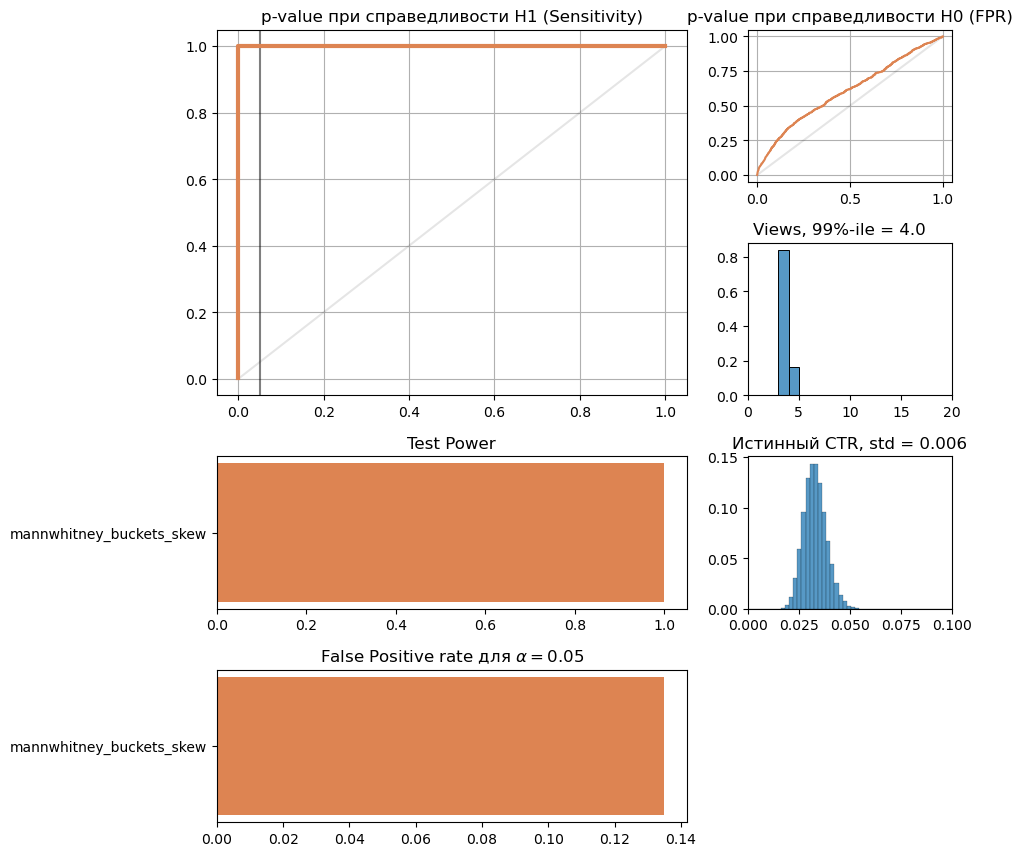

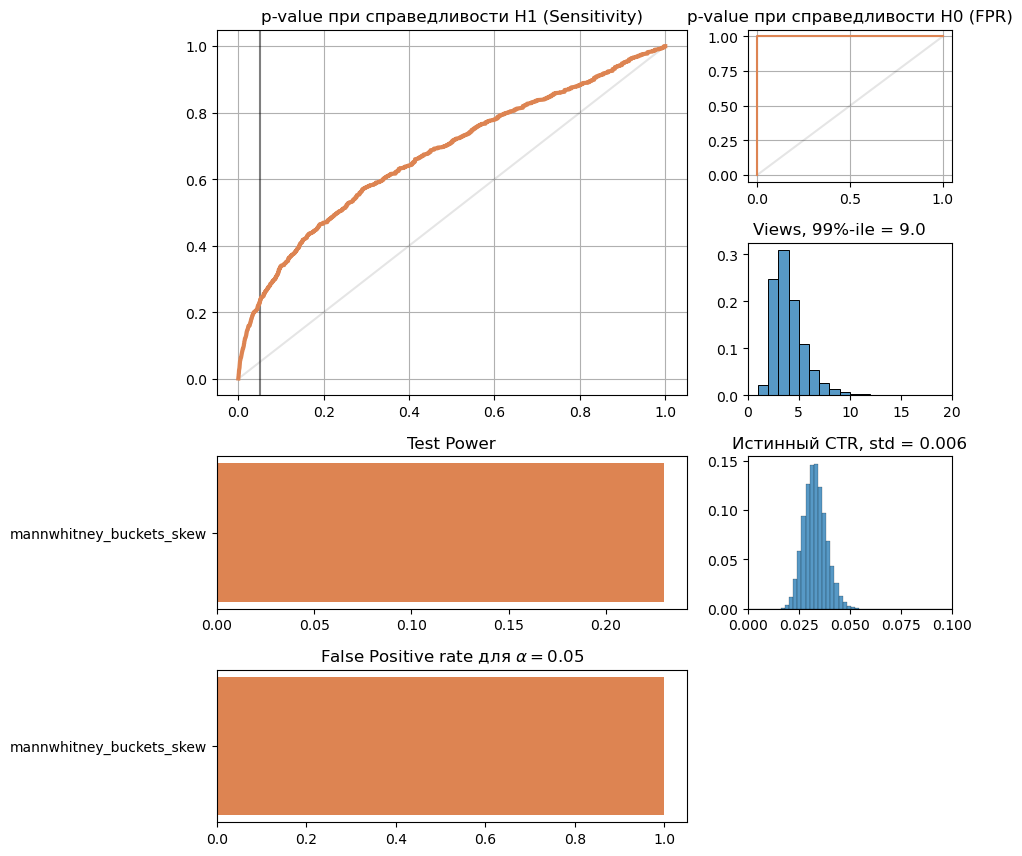

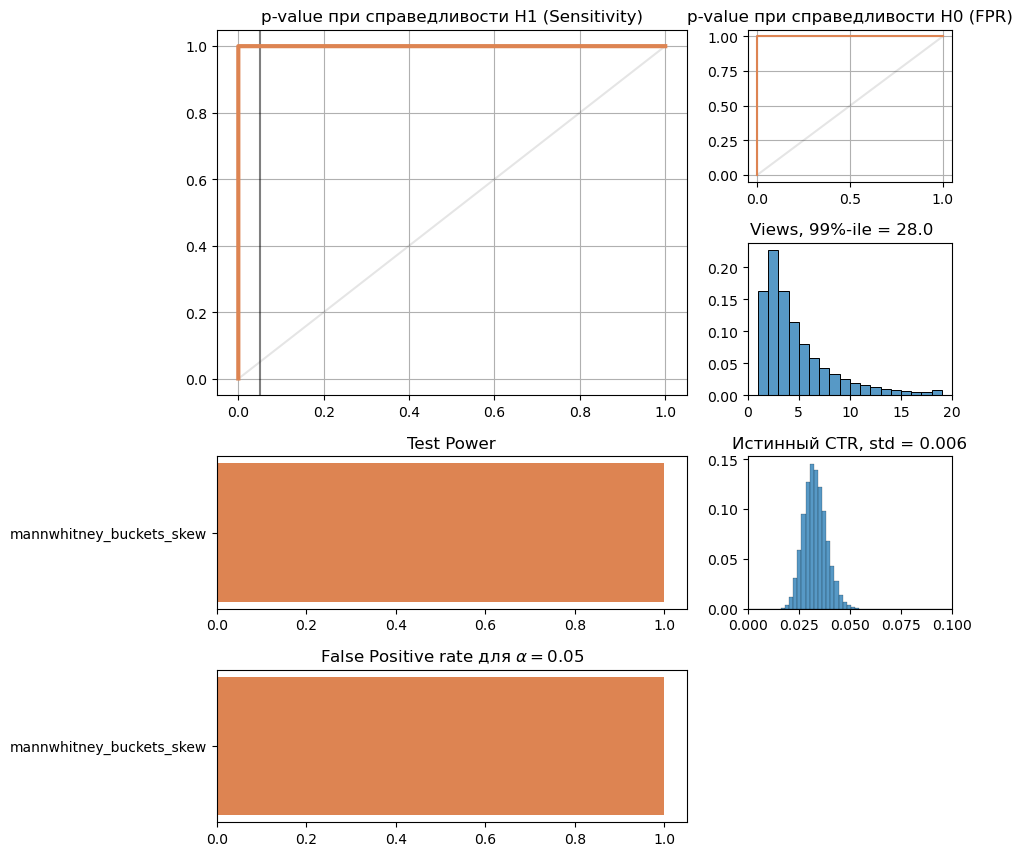

In [16]:
png_list = []
for sigma2 in sigma2_list:
    png_list.append(compare_tests(['mannwhitney_buckets_skew'], sigma2=sigma2))

In [17]:
to_gif(['test_data/'+x for x in png_list], 'test_data/mannwhitney_buckets_skew.gif')

**(ii) Варьируем $\beta$**

In [18]:
for beta in beta_list:
    folder_path = f'test_data/experiments={experiments}/sample_size={N}/uplift={uplift}/success_rate={success_rate}/beta={beta}/skew={1.0}'
    views_a_1, views_a_2, views_b,\
        success_rate_a_1, success_rate_a_2, success_rate_b,\
        clicks_a_1, clicks_a_2, clicks_b = data_loader(folder_path)
    
    p_values_aa = mannwhitney_buckets(
        clicks_a_1 / views_a_1, views_a_1,
        clicks_a_2 / views_a_2, views_a_2)

    p_values_ab = mannwhitney_buckets(
        clicks_a_1 / views_a_1, views_a_1,
        clicks_b / views_b, views_b)
        
    p_value_saver(folder_path, 'mannwhitney_buckets_beta', p_values_ab, p_values_aa)

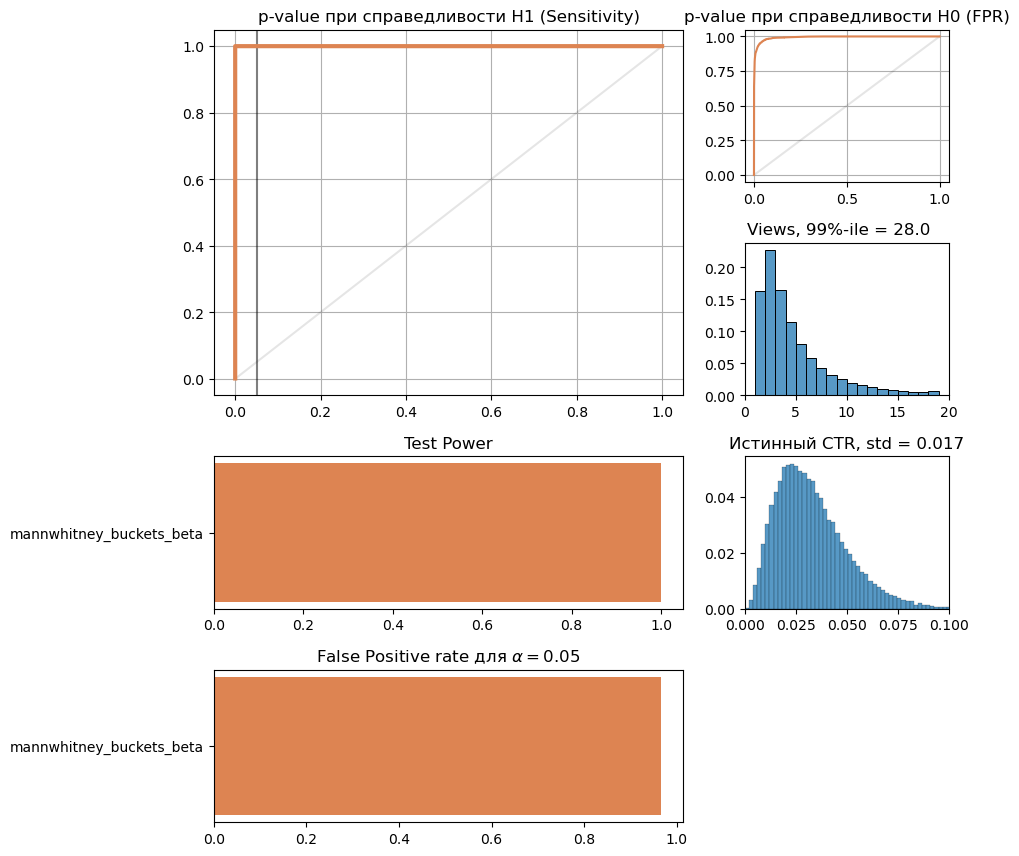

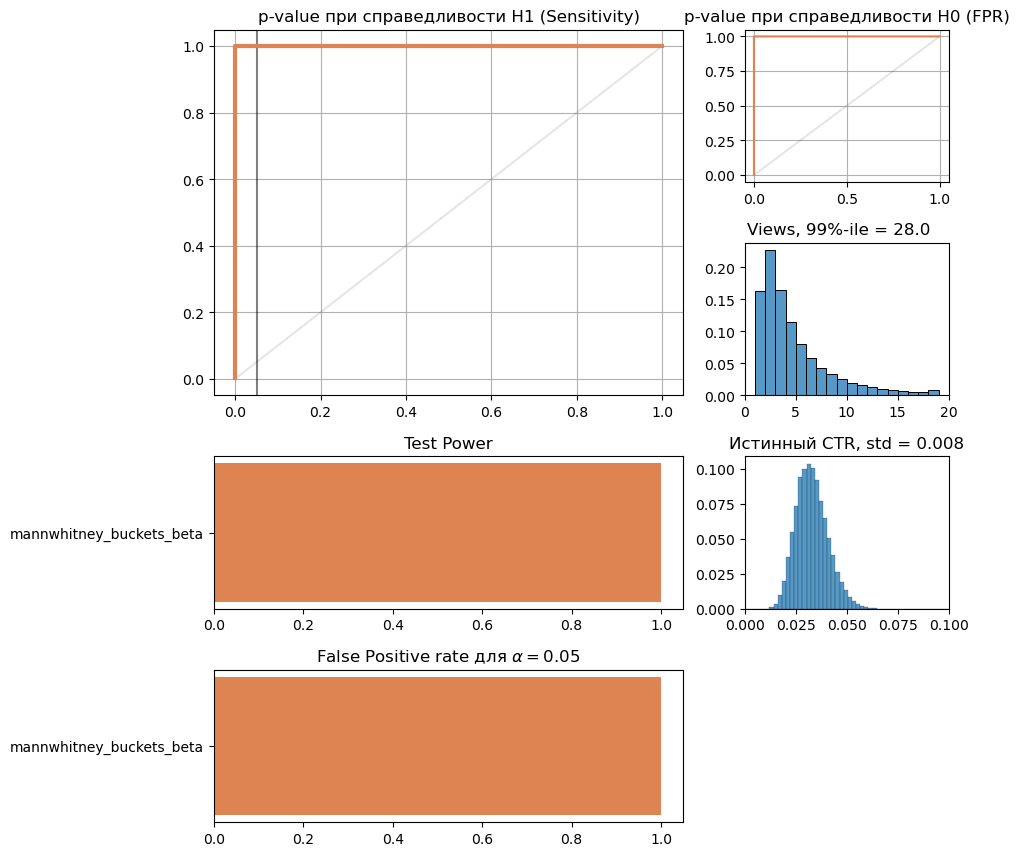

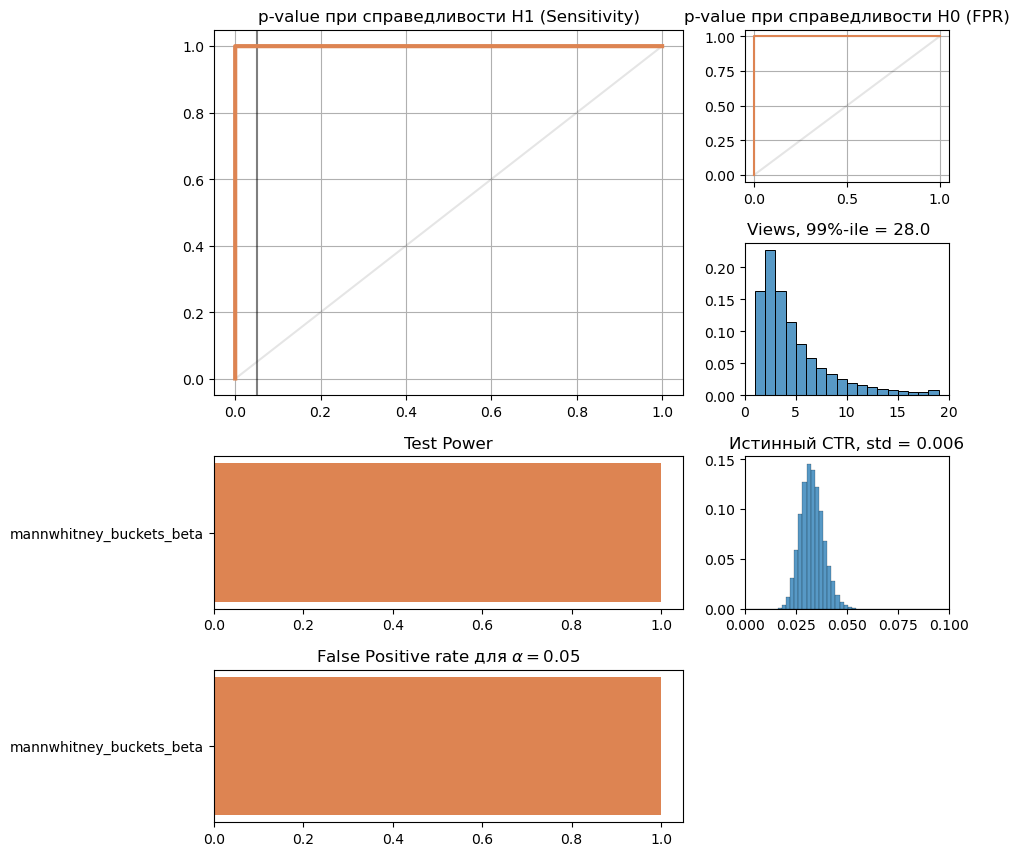

In [19]:
png_list = []
for beta in beta_list:
    png_list.append(compare_tests(['mannwhitney_buckets_beta'], beta=beta))

In [20]:
to_gif(['test_data/'+x for x in png_list], 'test_data/mannwhitney_buckets_beta.gif')

**б) Пуассоновский бутстреп**

In [21]:
def bootstrap(ctrs_0, weights_0, ctrs_1, weights_1, n_bootstrap=1000):
    """
    Считает взвешенный bootstrap и вычисляет p-value по распределению статистик из псевдовыборок
    :param ctrs_0: np.array вида (n_experiments, n_users), 
        CTR каждого пользователя из контрольной группы в каждом эксперименте 
    :param weights_0: np.array (n_experiments, n_users), 
        вес каждого пользователя из контрольной группы в каждом эксперименте 
    :param ctrs_1: np.array (n_experiments, n_users), 
        CTR каждого пользователя из целевой группы в каждом эксперименте 
    :param weights_1: np.array (n_experiments, n_users), 
        вес каждого пользователя из целевой группы в каждом эксперименте 
    :param n_bootstrap: int - кол-во бутстрапированных псевдовыборок для каждого эксперимента
    :return: np.array shape (n_experiments), двусторонние p-value
    """
    poisson_bootstraps = scipy.stats.poisson(1).rvs(
        (n_bootstrap, ctrs_0.shape[1])).astype(np.int32)

    values_0 = np.matmul(ctrs_0 * weights_0, poisson_bootstraps.T)
    weights_0 = np.matmul(weights_0, poisson_bootstraps.T)

    values_1 = np.matmul(ctrs_1 * weights_1, poisson_bootstraps.T)
    weights_1 = np.matmul(weights_1, poisson_bootstraps.T)

    deltas = values_1 / weights_1 - values_0 / weights_0

    positions = np.sum(deltas < 0, axis=1)

    return 2 * np.minimum(positions, n_bootstrap - positions) / n_bootstrap

**(i) Варьируем $\sigma^2$**

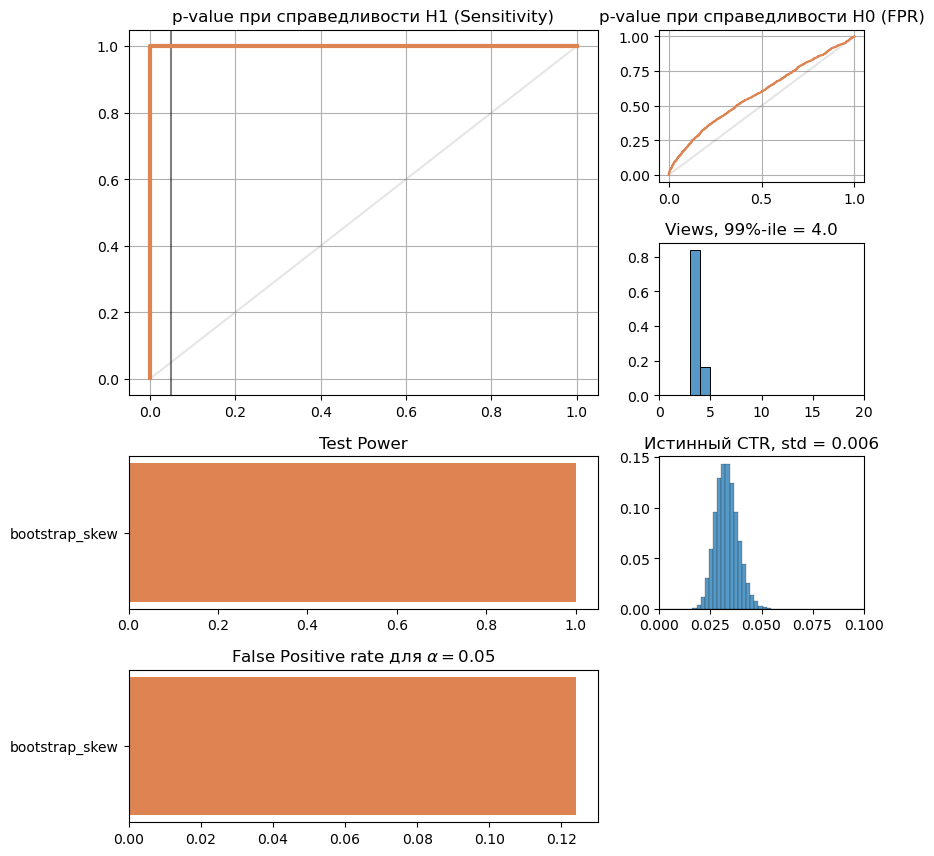

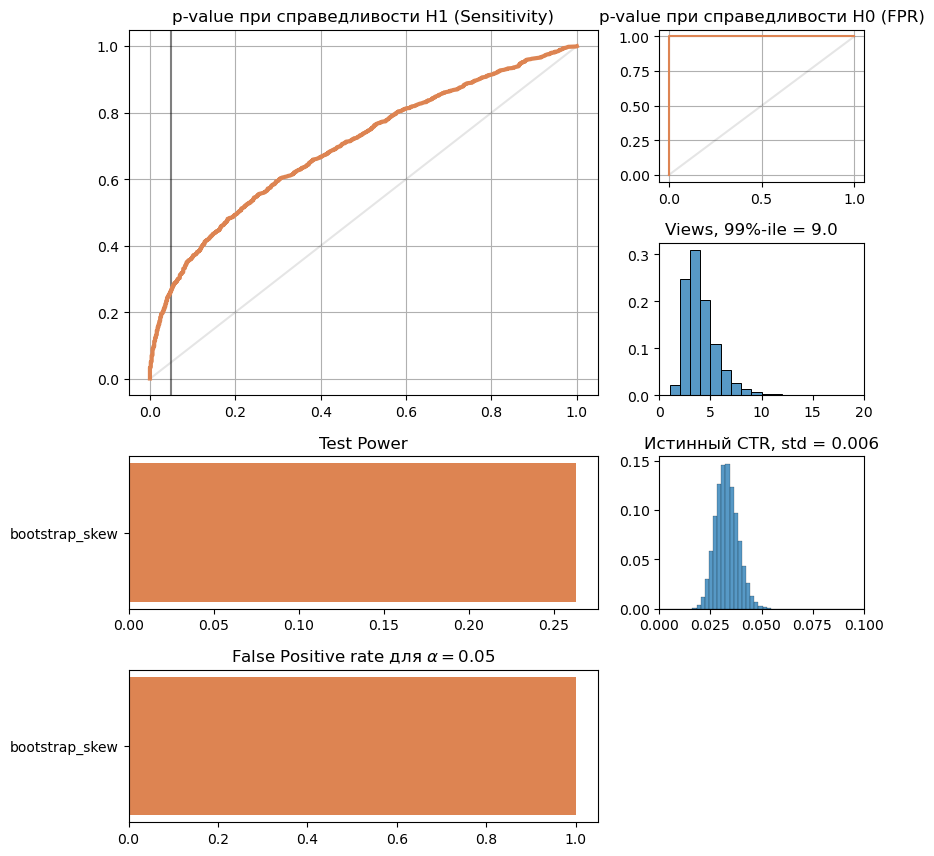

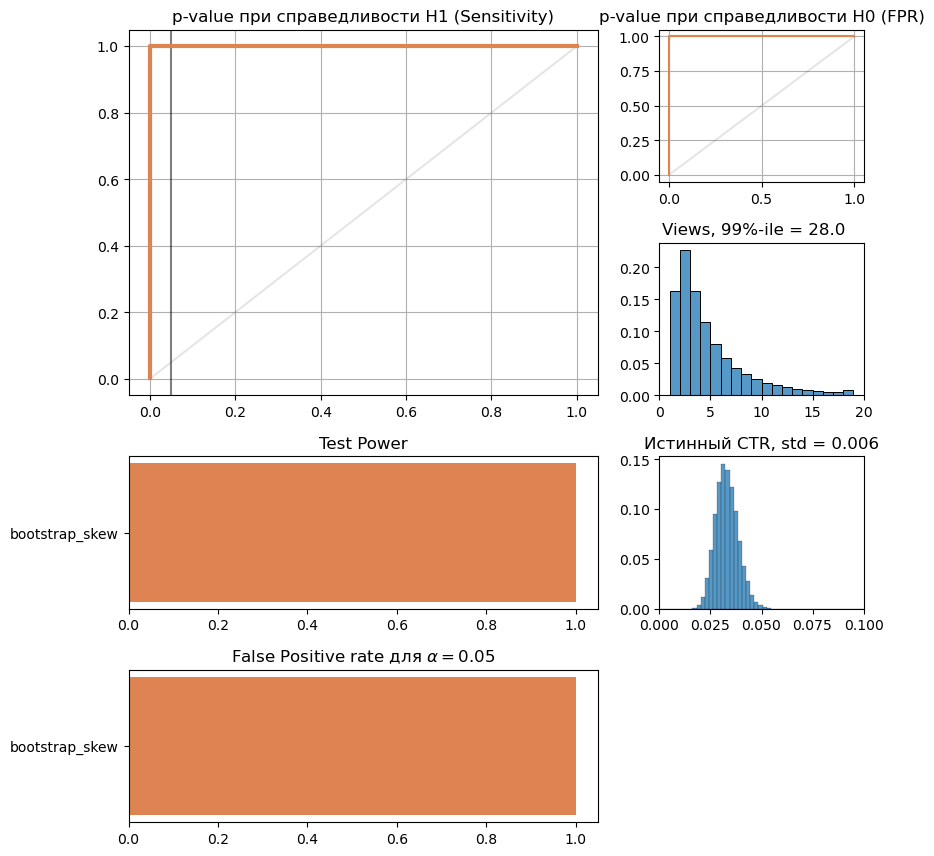

In [22]:
png_list = []
titles = ['bootstrap_skew']
for sigma2 in sigma2_list:
    folder_path = f'test_data/experiments={experiments}/sample_size={N}/uplift={uplift}/success_rate={success_rate}/beta={1000}/skew={sigma2}'
    
    views_a_1, views_a_2, views_b,\
        success_rate_a_1, success_rate_a_2, success_rate_b,\
        clicks_a_1, clicks_a_2, clicks_b = data_loader(folder_path)
    
    p_values_ab = [bootstrap(clicks_a_1 / views_a_1, views_a_1, clicks_b / views_b, views_b)]
    p_values_aa = [bootstrap(clicks_a_1 / views_a_1, views_a_1, clicks_a_2 / views_a_2, views_a_2)]
  
    views_target = views_b
    ground_truth_ctr_target = success_rate_b 
    color = colors[0]

    test_data = {}
    for i,j in enumerate(titles):
        test_data[j] = (p_values_ab[i],p_values_aa[i],colors[i+1])
    pict = plot_summary(test_data, ground_truth_ctr_target, views_target)
    name = f'experiments={1000}_sample_size={5000}_uplift={0.1}_success_rate={0.03}_beta={1000}_skew={sigma2}.png'
    png_list.append(name)
    pict.savefig(f'test_data/{name}')
    
    #p_value_saver(folder_path, 'bootstrap_skew', p_values_ab, p_values_aa)

In [23]:
to_gif(['test_data/' + x for x in png_list], 'test_data/bootstrap_skew.gif')

**(ii) Варьируем $\beta$**

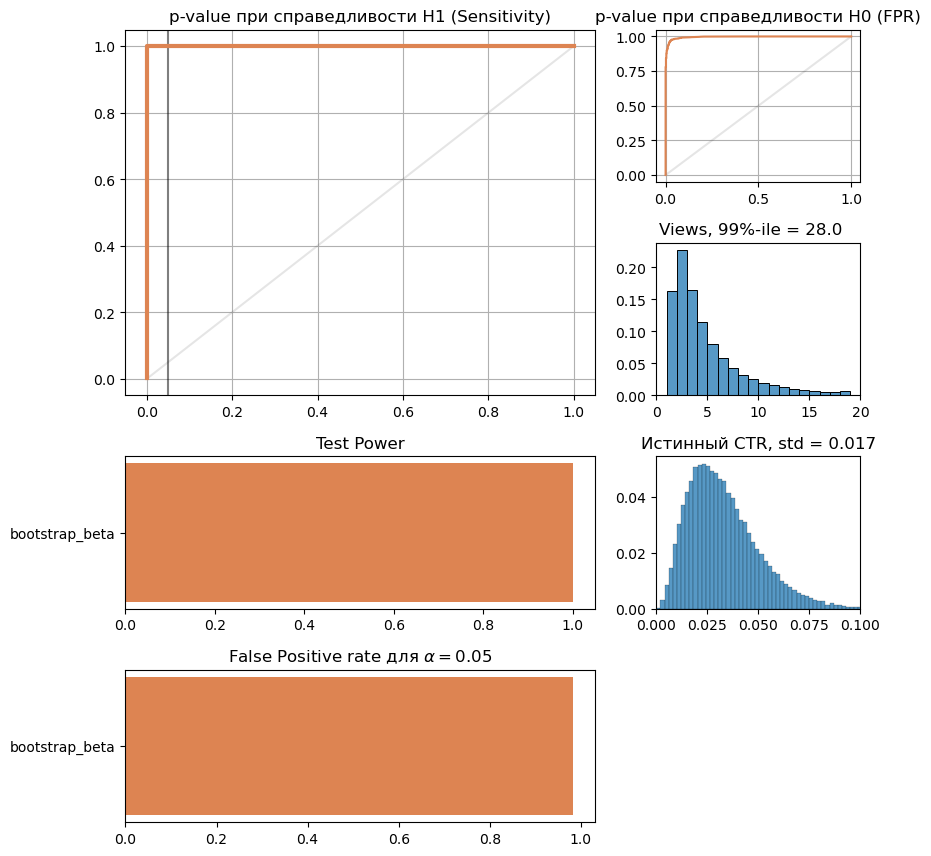

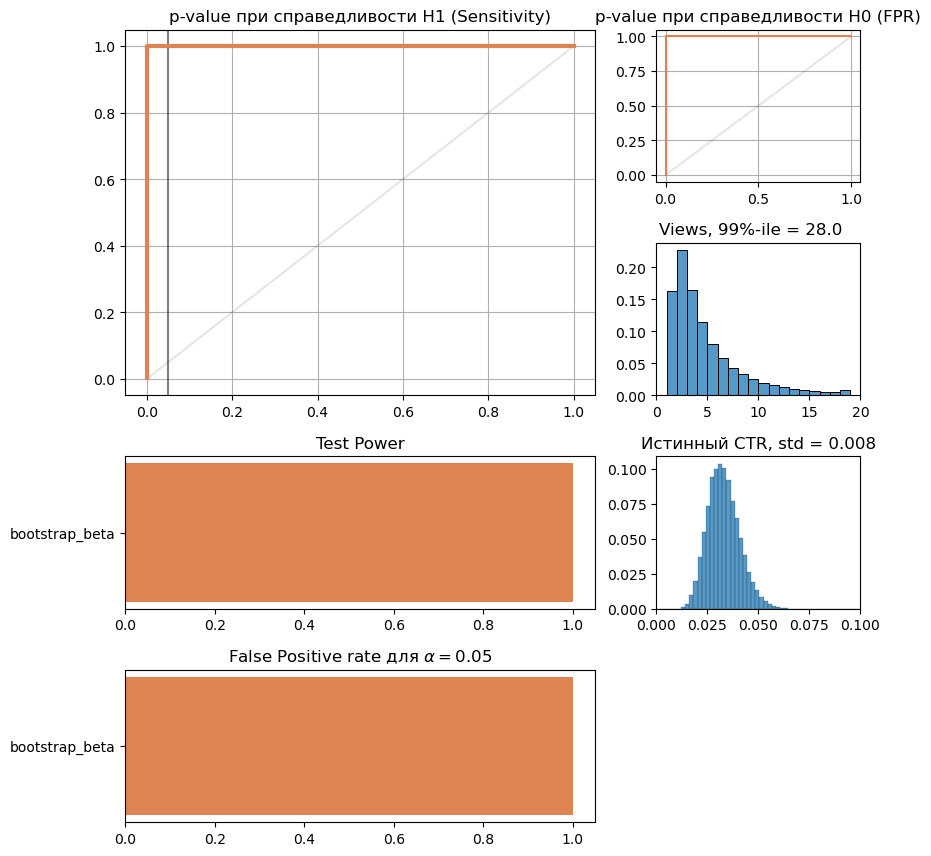

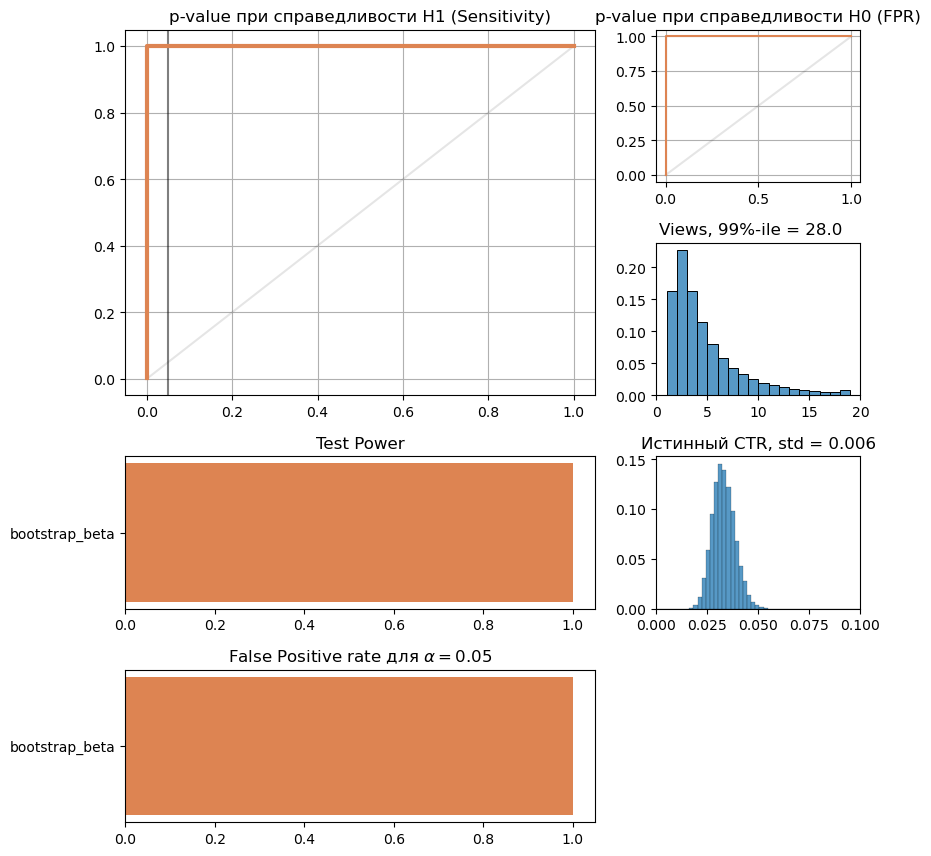

In [24]:
png_list = []
titles = ['bootstrap_beta']
for beta in beta_list:
    folder_path = f'test_data/experiments={experiments}/sample_size={N}/uplift={uplift}/success_rate={success_rate}/beta={beta}/skew={1.0}'
    
    views_a_1, views_a_2, views_b,\
        success_rate_a_1, success_rate_a_2, success_rate_b,\
        clicks_a_1, clicks_a_2, clicks_b = data_loader(folder_path)
    
    p_values_ab = [bootstrap(clicks_a_1 / views_a_1, views_a_1, clicks_b / views_b, views_b)]
    p_values_aa = [bootstrap(clicks_a_1 / views_a_1, views_a_1, clicks_a_2 / views_a_2, views_a_2)]
  
    views_target = views_b
    ground_truth_ctr_target = success_rate_b 
    color = colors[0]

    test_data = {}
    for i,j in enumerate(titles):
        test_data[j] = (p_values_ab[i],p_values_aa[i],colors[i+1])
    pict = plot_summary(test_data, ground_truth_ctr_target, views_target)
    name = f'experiments={1000}_sample_size={5000}_uplift={0.1}_success_rate={0.03}_beta={beta}_skew={1.0}.png'
    png_list.append(name)
    pict.savefig(f'test_data/{name}')

In [25]:
to_gif(['test_data/' + x for x in png_list], 'test_data/bootstrap_beta.gif')

<span style="color:blue">
Изображения находятся в следующих файлах:<br>
- 'test_data/mannwhitney_buckets_skew.gif',<br>
- 'test_data/mannwhitney_buckets_beta.gif',<br>
- 'test_data/bootstrap_skew.gif',<br>
- 'test_data/bootstrap_beta.gif'.<br>

Согласно полученным графикам, оба теста на чеках ведут себя примерно одинаково и не являются значимыми 
даже при небольших отклонениях.
</span>